In [1]:
#pip install multimatch-gaze
import warnings
warnings.filterwarnings("ignore")
#for handling RAM
import gc 
import pingouin as pg

#stats
from statsmodels.stats.anova import AnovaRM
#import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import pingouin as pg


#my to go packages
import math
import random
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.gridspec import GridSpec
from matplotlib import cm


#for readin
import glob # Package for Unix-style pathname pattern expansion
import os   # Python operating system interface

#for signal processing
from scipy.interpolate import CubicSpline,interp1d
import scipy.signal as signal
import scipy.stats as stats
from scipy.signal import filtfilt, butter
from scipy.fft import rfft, rfftfreq
from scipy.stats import sem 
from scipy.stats import norm
from scipy.stats import ttest_rel
import scipy.io

#other packages
import ast
import itertools
from itertools import groupby
from more_itertools import consecutive_groups
import more_itertools as mit
from operator import itemgetter
import statistics
from sklearn.mixture import GaussianMixture

#import math, pywt

In [2]:
def fs(width,height):#setting plot size
    plt.rcParams['figure.figsize'] = (width,height)


# read 

In [29]:
wrongOrder = ['shape','length','position','direction','duration']
rightOrder = ['shape','direction','length', 'position','duration']
mapOrder = dict(zip(wrongOrder,rightOrder))

In [30]:
trl_withScore_formatted = pd.read_csv('Z:/yueying/gazeObject_YueyingDong/results/similarityMetricsAgg/trl2trl_multiMatch_5Dimension.csv').iloc[:,1:]
trl_withScore_formatted['task'] = ['retrocue' if i <= 359 else 'precue' for i in trl_withScore_formatted.participant]
trl_withScore_formatted['dimension'] = [mapOrder[i] for i in trl_withScore_formatted.dimension] # need to change the dimension as the original output had the wrong label

# draw

In [31]:
comparison = 'stim2delay'
what2Draw =  ['across, same image', 'across, diff image']
dimensionOrder = ['shape','direction','length', 'position','duration']
if comparison == 'stim2delay':      
    what2Draw = ['within','across, same image', 'across, diff image']

In [32]:
#order=['across, diff image','across, same image','within',],  row_order=dimensionOrder,col_order=['precue','retrocue'],

In [33]:
import matplotlib.ticker as ticker


In [34]:
plt.rcParams['font.family'] = 'arial'

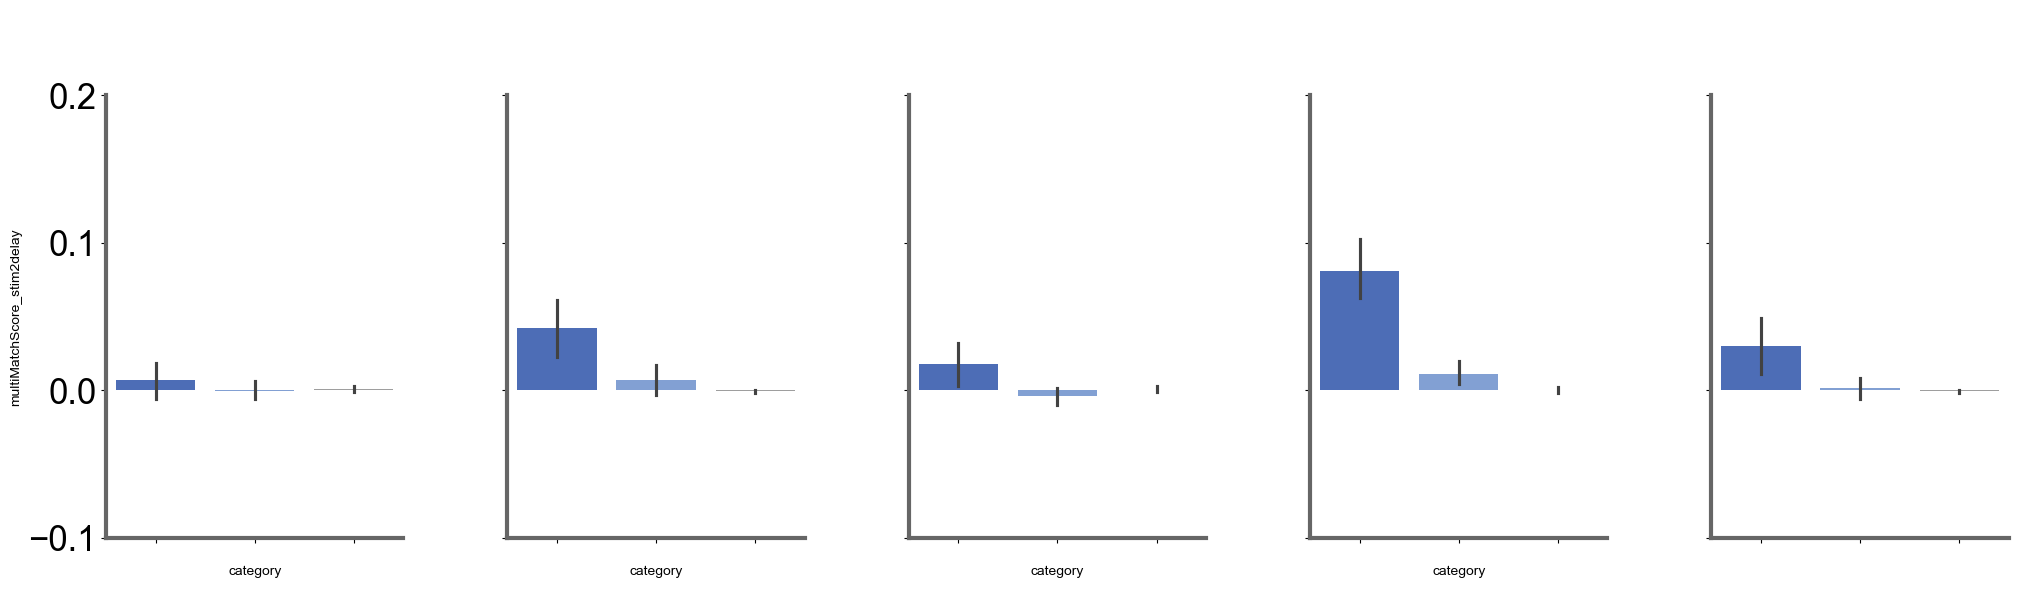

In [35]:
meanDf = trl_withScore_formatted.groupby(['participant','category','task','dimension']).mean(numeric_only=True).reset_index()
acrossSameDiff = meanDf[meanDf.category.isin(what2Draw)]

f = sns.catplot( y =f'multiMatchScore_{comparison}',x = 'category',hue = 'category',
                order =what2Draw,
                palette=['#9e9e9eff','#759ce0','#3b66c8',],
                col_order=dimensionOrder,row_order=['precue','retrocue'],col = 'dimension',aspect=0.75
                ,height=5.3,kind = 'bar',
            data = acrossSameDiff[acrossSameDiff.task == 'precue'])

labelOrder = ['shape', 'direction', 'length', 'position', 'duration','','','','','']

for n,ax in enumerate(f.axes.flat):
    ax.tick_params(labelsize=25)
    ax.set_title(labelOrder[n],color = 'white',fontsize = 30,)
    ax.set_xticks(ticks=[0, 1, 2], labels=['within', 'same image', 'diff image'],color = 'white',fontsize = 10)
    for spine in ax.spines.values():
            spine.set_linewidth(3)
            spine.set_color('#666666')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.xlabel('condition',fontsize = 15,color = 'white')
#
# plt.subplots_adjust(top=0.9)
plt.suptitle(f'subj average \n {comparison} comparison',fontsize = 20,y = 1.1,c = 'white')
plt.ylim(-0.1,0.2)
#
# plt.tight_layout()
plt.subplots_adjust(wspace=0.35)



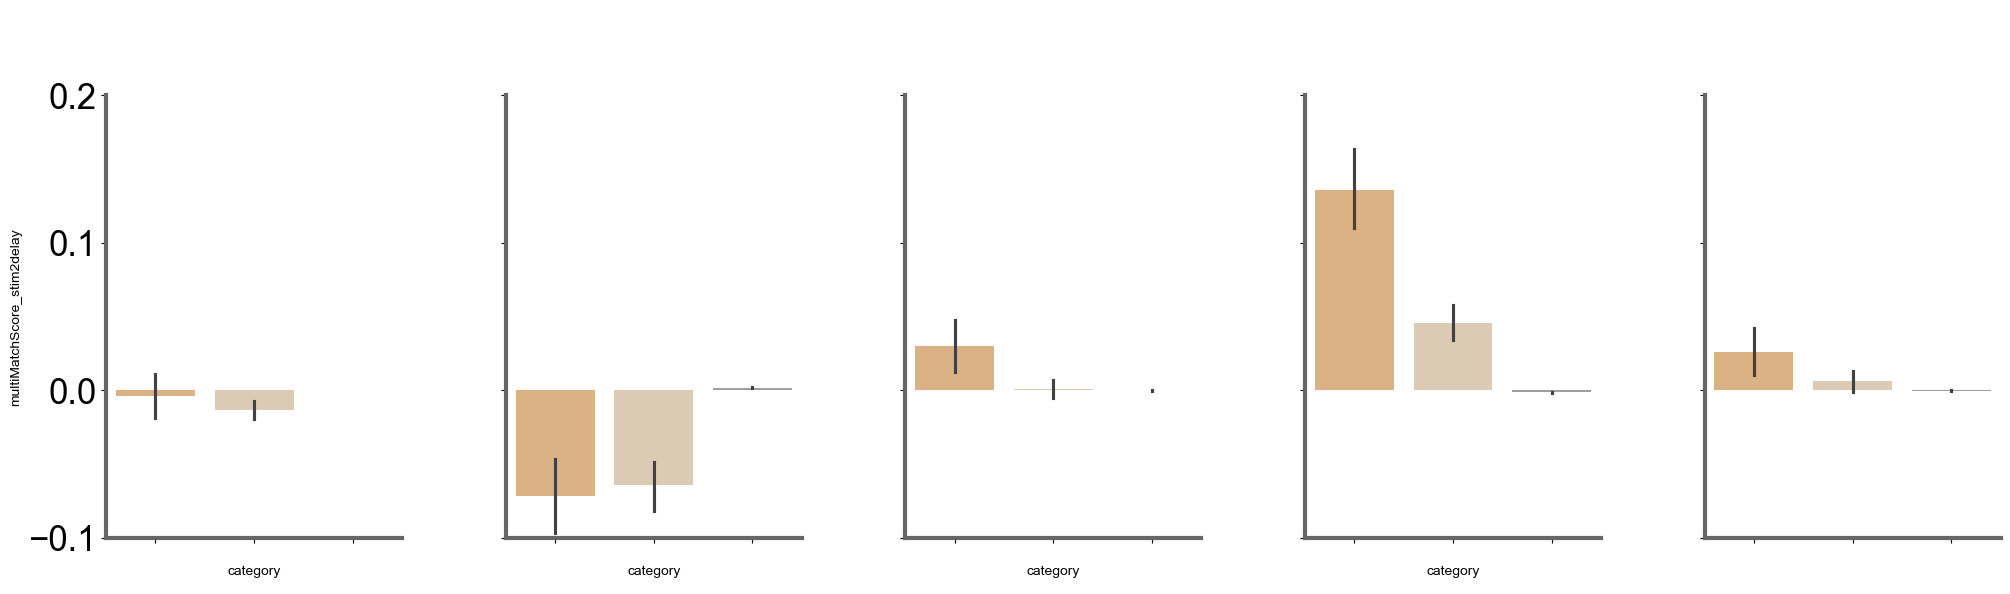

In [36]:
meanDf = trl_withScore_formatted.groupby(['participant','category','task','dimension']).mean(numeric_only=True).reset_index()
acrossSameDiff = meanDf[meanDf.category.isin(what2Draw)]

f = sns.catplot( y =f'multiMatchScore_{comparison}',x = 'category',hue = 'category',
                order =what2Draw,
                palette=['#9e9e9eff','#e2ccae','#eab375',],
                col_order=dimensionOrder,row_order=['precue','retrocue'],col = 'dimension',aspect=0.75
                ,height=5.3,kind = 'bar',
            data = acrossSameDiff[acrossSameDiff.task == 'retrocue'])

labelOrder = ['shape', 'direction', 'length', 'position', 'duration','','','','','']

for n,ax in enumerate(f.axes.flat):
    ax.tick_params(labelsize=25)
    ax.set_title(labelOrder[n],color = 'white',fontsize = 30)
    ax.set_xticks(ticks=[0, 1, 2],color = 'white', labels=['within', 'same image', 'diff image'],fontsize = 10)
    for spine in ax.spines.values():
            spine.set_linewidth(3)
            spine.set_color('#666666')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.xlabel('condition',color = 'white',fontsize = 15)
#
# plt.subplots_adjust(top=0.9)
plt.suptitle(f'subj average \n {comparison} comparison',color = 'white',fontsize = 20,y = 1.1)
plt.ylim(-0.1,0.2)
#
# plt.tight_layout()
plt.subplots_adjust(wspace=0.35)



In [37]:
for metric in dimensionOrder:
    print(metric)
    print(pg.rm_anova(subject='participant',within = 'category', dv = 'multiMatchScore_stim2delay',
                data = acrossSameDiff[(acrossSameDiff.task == 'precue')&(acrossSameDiff.dimension == metric)],
                effsize = 'np2'
                )
                
                )

shape
     Source  ddof1  ddof2     F  p-unc   np2   eps
0  category      2     80 0.939  0.395 0.023 0.685
direction
     Source  ddof1  ddof2      F  p-unc   np2   eps
0  category      2     80 14.342  0.000 0.264 0.770
length
     Source  ddof1  ddof2     F  p-unc   np2   eps
0  category      2     80 6.179  0.003 0.134 0.593
position
     Source  ddof1  ddof2      F  p-unc   np2   eps
0  category      2     80 44.982  0.000 0.529 0.587
duration
     Source  ddof1  ddof2     F  p-unc   np2   eps
0  category      2     80 8.421  0.000 0.174 0.613


In [38]:
for metric in dimensionOrder:
    print(metric)
    print(pg.rm_anova(subject='participant',within = 'category', dv = 'multiMatchScore_stim2delay',effsize = 'np2',
                data = acrossSameDiff[(acrossSameDiff.task == 'retrocue')&(acrossSameDiff.dimension == metric)]))

shape
     Source  ddof1  ddof2     F  p-unc   np2   eps
0  category      2     80 2.324  0.104 0.055 0.616
direction
     Source  ddof1  ddof2      F  p-unc  p-GG-corr   np2   eps  sphericity  \
0  category      2     80 28.879  0.000      0.000 0.419 0.795       False   

   W-spher  p-spher  
0    0.742    0.003  
length
     Source  ddof1  ddof2     F  p-unc   np2   eps
0  category      2     80 8.468  0.000 0.175 0.561
position
     Source  ddof1  ddof2      F  p-unc   np2   eps
0  category      2     80 65.859  0.000 0.622 0.654
duration
     Source  ddof1  ddof2     F  p-unc   np2   eps
0  category      2     80 6.983  0.002 0.149 0.635


In [39]:
jj = []

for metric in dimensionOrder:
    print(metric,)
    q = stats.ttest_rel(acrossSameDiff[(acrossSameDiff.category =='across, diff image') & (acrossSameDiff.task =='precue') &
                               (acrossSameDiff.dimension == metric) ].multiMatchScore_stim2delay,
                acrossSameDiff[(acrossSameDiff.category =='across, same image') & (acrossSameDiff.task =='precue')&
                               (acrossSameDiff.dimension == metric) ].multiMatchScore_stim2delay,
                            nan_policy='omit')
    jj.append(q)
    print(' ',q)

shape
  TtestResult(statistic=0.2885364578503454, pvalue=0.7744261208538836, df=40)
direction
  TtestResult(statistic=-1.3013738562433996, pvalue=0.2005765408786598, df=40)
length
  TtestResult(statistic=1.7012716898141742, pvalue=0.09665441752678526, df=40)
position
  TtestResult(statistic=-2.971760253936641, pvalue=0.004992174097791752, df=40)
duration
  TtestResult(statistic=-0.5632414534854383, pvalue=0.5764144029958187, df=40)


In [14]:
pd.DataFrame(jj)

,statistic,pvalue
0,0.288536,0.774426
1,-1.301374,0.200577
2,1.701272,0.096654
3,-2.971760,0.004992
4,-0.563241,0.576414


In [15]:
jj = []

for metric in dimensionOrder:
    print(metric,)
    q = stats.ttest_rel(acrossSameDiff[(acrossSameDiff.category =='across, diff image') & (acrossSameDiff.task =='retrocue') &
                               (acrossSameDiff.dimension == metric) ].multiMatchScore_stim2delay,
                acrossSameDiff[(acrossSameDiff.category =='across, same image') & (acrossSameDiff.task =='retrocue')&
                               (acrossSameDiff.dimension == metric) ].multiMatchScore_stim2delay,
                            nan_policy='omit')
    jj.append(np.round(q,3))
    print(' ',q)

shape
  TtestResult(statistic=4.427397858093025, pvalue=7.187802397978832e-05, df=40)
direction
  TtestResult(statistic=7.540053740917781, pvalue=3.3563036382656154e-09, df=40)
length
  TtestResult(statistic=-0.34703045682326783, pvalue=0.73038766598626, df=40)
position
  TtestResult(statistic=-7.215017949404818, pvalue=9.429112300918623e-09, df=40)
duration
  TtestResult(statistic=-1.72761378344718, pvalue=0.09177239422141142, df=40)


In [16]:
pd.DataFrame(jj)

,0,1
0,4.427,0.000
1,7.540,0.000
2,-0.347,0.730
3,-7.215,0.000
4,-1.728,0.092


Text(0.5, 1.2, 'subj average \n stim2delay comparison')

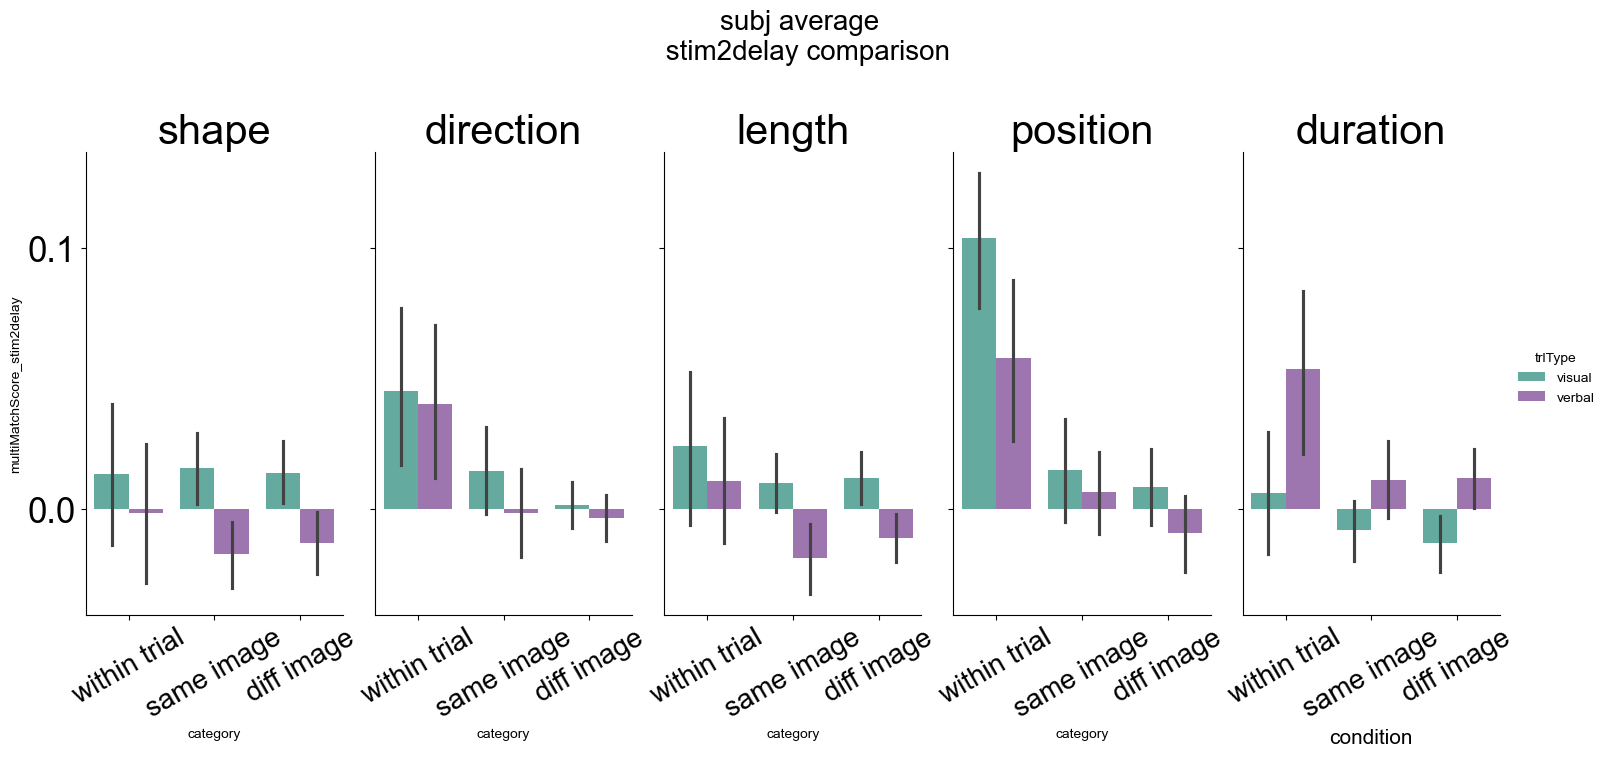

In [17]:
meanDf = trl_withScore_formatted.groupby(['participant','category','task','trlType','dimension']).mean(numeric_only=True).reset_index()
acrossSameDiff = meanDf[meanDf.category.isin(what2Draw)]

f = sns.catplot( y =f'multiMatchScore_{comparison}',x = 'category',hue = 'trlType',
                order =['within','across, same image','across, diff image'],hue_order=['visual','verbal'],
                palette=['#59b6a6','#a06bb9',],
                col_order=dimensionOrder,
                col = 'dimension',aspect=0.55
                ,height=5.5,kind = 'bar',
            data = acrossSameDiff[acrossSameDiff.task == 'precue'])

labelOrder = ['shape', 'direction', 'length', 'position', 'duration','','','','','']

for n,ax in enumerate(f.axes.flat):
    ax.tick_params(labelsize=25)
    ax.set_title(labelOrder[n],fontsize = 30)
    ax.set_xticks(ticks=[0,1,2], labels=['within trial','same image','diff image'],
                  rotation = 30,fontsize = 20)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.xlabel('condition',fontsize = 15)
#
# plt.subplots_adjust(top=0.9)
plt.suptitle(f'subj average \n {comparison} comparison',fontsize = 20,y = 1.2)
#plt.ylim(2.4,2.55)
#
# plt.tight_layout()



Text(0.5, 1.2, 'subj average \n stim2delay comparison')

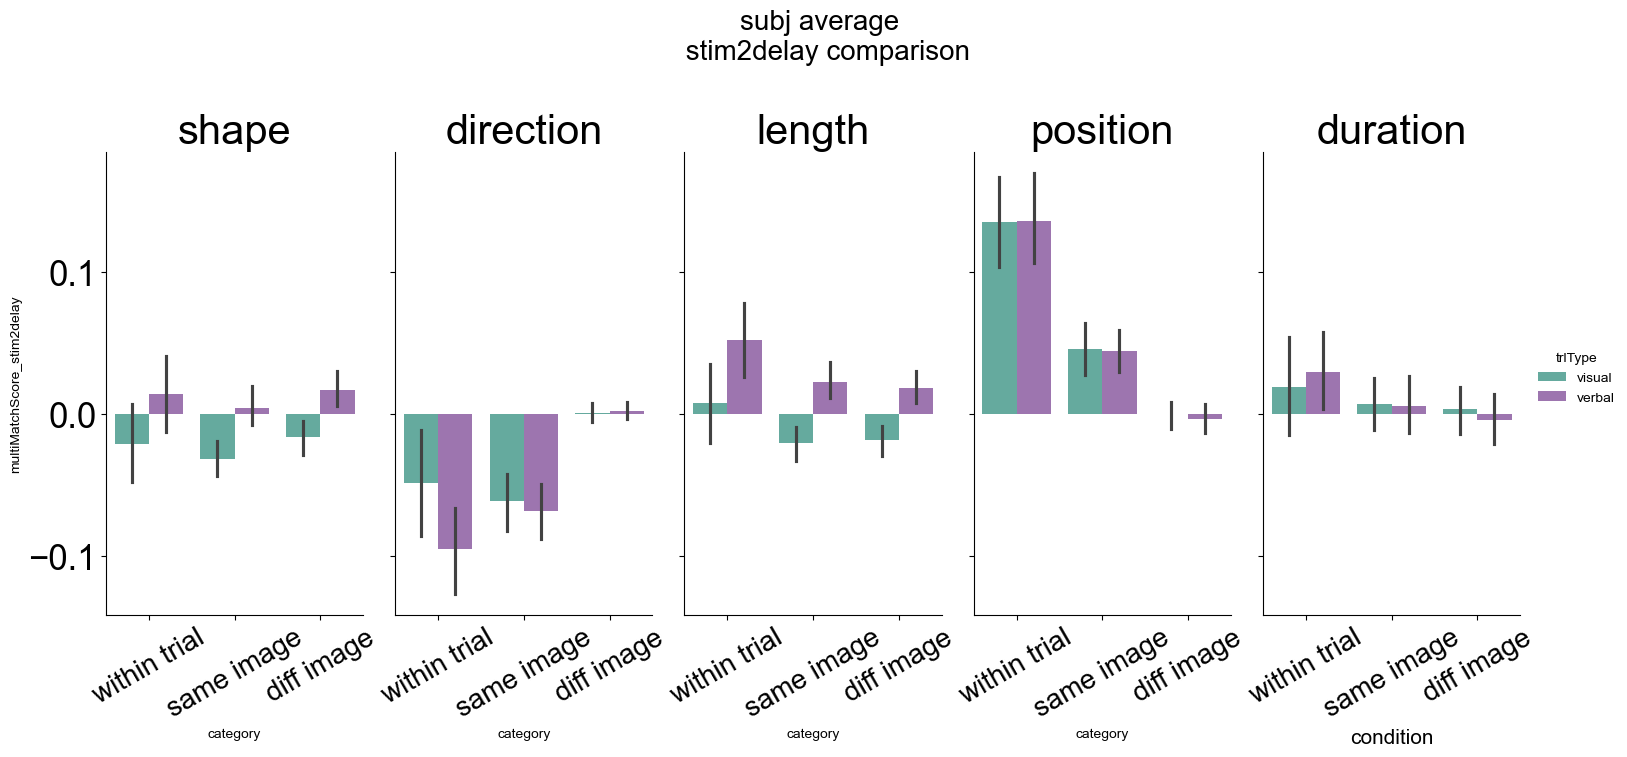

In [18]:
meanDf = trl_withScore_formatted.groupby(['participant','category','task','trlType','dimension']).mean(numeric_only=True).reset_index()
acrossSameDiff = meanDf[meanDf.category.isin(what2Draw)]

f = sns.catplot( y =f'multiMatchScore_{comparison}',x = 'category',hue = 'trlType',
                order =['within','across, same image','across, diff image'],hue_order=['visual','verbal'],
                palette=['#59b6a6','#a06bb9',],
                col_order=dimensionOrder,
                col = 'dimension',aspect=0.55
                ,height=5.5,kind = 'bar',
            data = acrossSameDiff[acrossSameDiff.task == 'retrocue'])

labelOrder = ['shape', 'direction', 'length', 'position', 'duration','','','','','']

for n,ax in enumerate(f.axes.flat):
    ax.tick_params(labelsize=25)
    ax.set_title(labelOrder[n],fontsize = 30)
    ax.set_xticks(ticks=[0,1,2], labels=['within trial','same image','diff image'],
                  rotation = 30,fontsize = 20)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.xlabel('condition',fontsize = 15)
#
# plt.subplots_adjust(top=0.9)
plt.suptitle(f'subj average \n {comparison} comparison',fontsize = 20,y = 1.2)
#plt.ylim(2.4,2.55)
#
# plt.tight_layout()



In [19]:
plt.rcParams['font.family'] = 'arial'

(-0.15, 0.2)

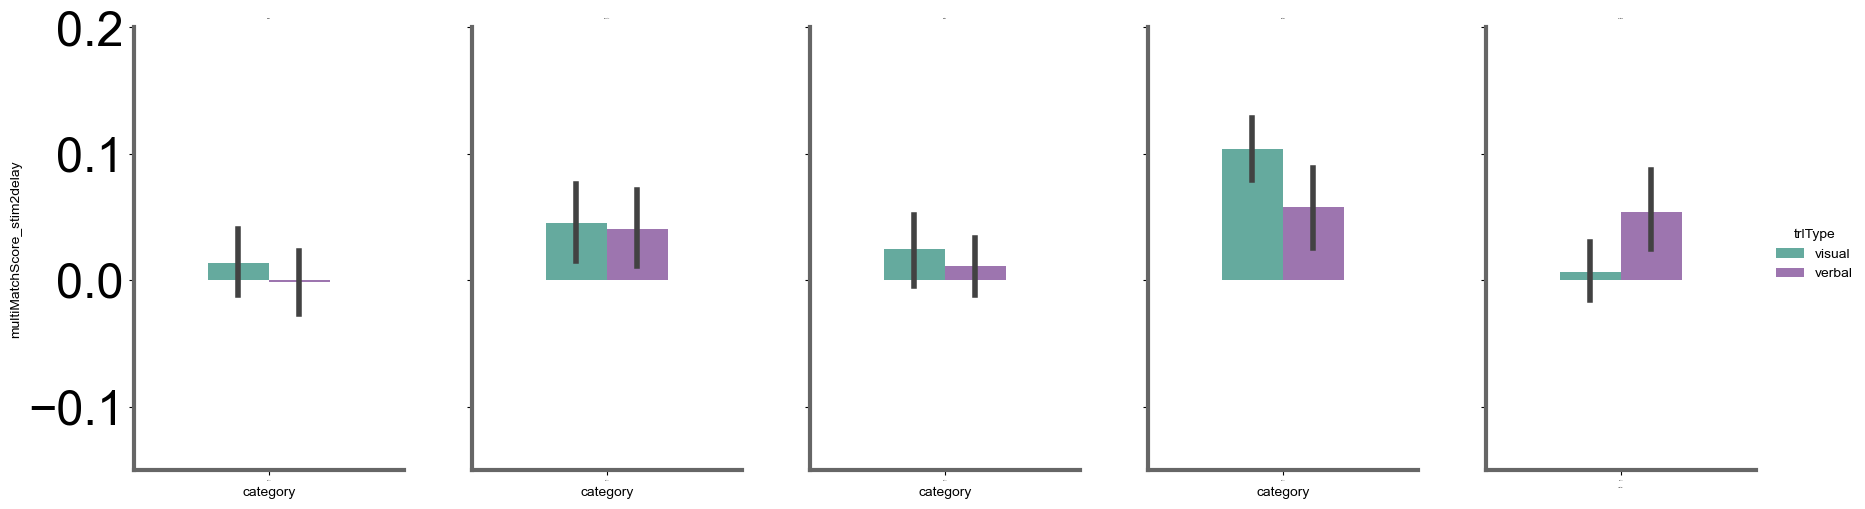

In [20]:
meanDf = trl_withScore_formatted.groupby(['participant','category','task','trlType','dimension']).mean(numeric_only=True).reset_index()
acrossSameDiff = meanDf[meanDf.category.isin(what2Draw)]

f = sns.catplot( y =f'multiMatchScore_{comparison}',x = 'category',hue = 'trlType',
                order =['within'],hue_order=['visual','verbal'],
                palette=['#59b6a6','#a06bb9',],width=0.45,errwidth = 4,
                col_order=dimensionOrder,
                col = 'dimension',aspect=0.65
                ,height=5.3,kind = 'bar',
            data = acrossSameDiff[acrossSameDiff.task == 'precue'])

labelOrder = ['shape', 'direction', 'length', 'position', 'duration','','','','','']

for n,ax in enumerate(f.axes.flat):
    ax.tick_params(labelsize=35)
    ax.set_title(labelOrder[n],fontsize = 0)
    ax.set_xticks(ticks=[0,], labels=['within',],fontsize = 0)
    for spine in ax.spines.values():
            spine.set_linewidth(3)
            spine.set_color('#666666')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.xlabel('condition',fontsize = 0)
#
plt.subplots_adjust(wspace=0.25)
#plt.suptitle(f'subj average \n {comparison} comparison',fontsize = 20,y = 1.1)
#plt.ylim(2.4,2.55)
plt.ylim(-0.15,0.2)

# plt.tight_layout()



(-0.15, 0.2)

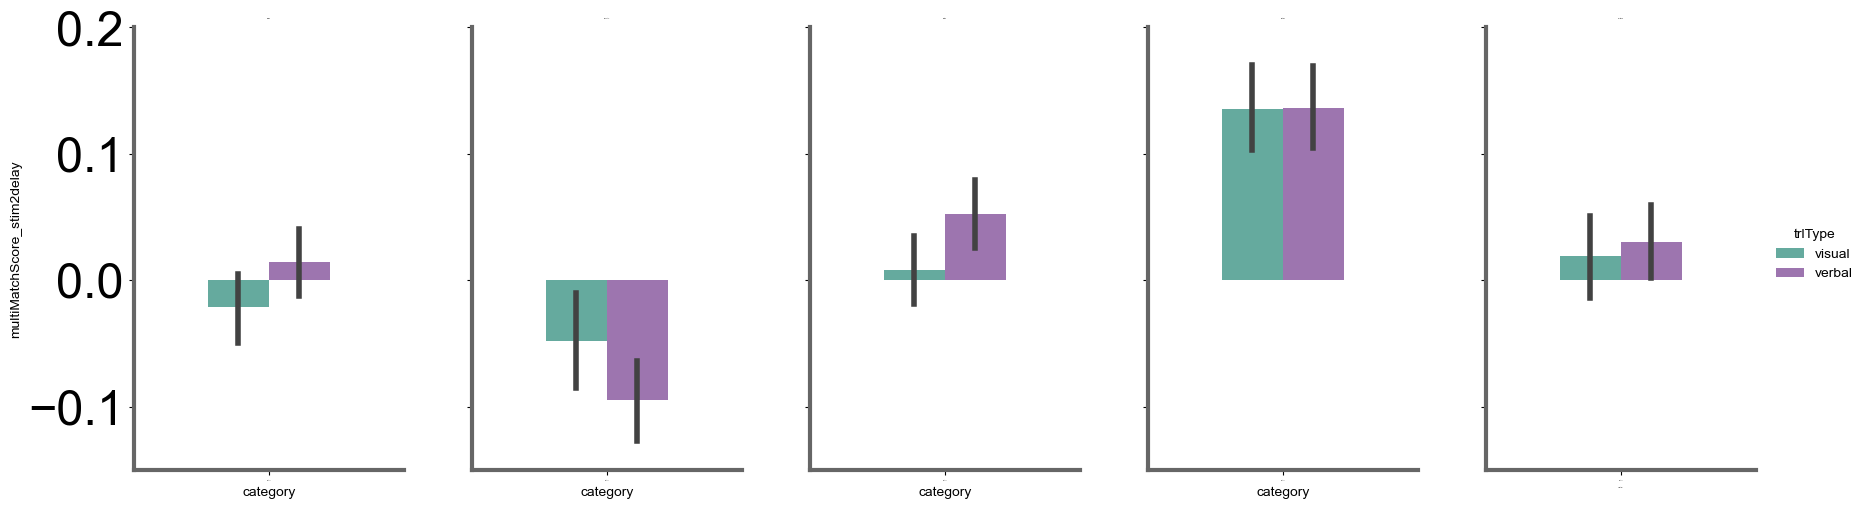

In [21]:
meanDf = trl_withScore_formatted.groupby(['participant','category','task','trlType','dimension']).mean(numeric_only=True).reset_index()
acrossSameDiff = meanDf[meanDf.category.isin(what2Draw)]

f = sns.catplot( y =f'multiMatchScore_{comparison}',x = 'category',hue = 'trlType',
                order =['within'],hue_order=['visual','verbal'],
                palette=['#59b6a6','#a06bb9',],width=0.45,errwidth = 4,
                col_order=dimensionOrder,
                col = 'dimension',aspect=0.65
                ,height=5.3,kind = 'bar',
            data = acrossSameDiff[acrossSameDiff.task == 'retrocue'])

labelOrder = ['shape', 'direction', 'length', 'position', 'duration','','','','','']

for n,ax in enumerate(f.axes.flat):
    ax.tick_params(labelsize=35)
    ax.set_title(labelOrder[n],fontsize = 0)
    ax.set_xticks(ticks=[0,], labels=['within',],fontsize = 0)
    for spine in ax.spines.values():
            spine.set_linewidth(3)
            spine.set_color('#666666')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.xlabel('condition',fontsize = 0)
#
plt.subplots_adjust(wspace=0.25)
#plt.suptitle(f'subj average \n {comparison} comparison',fontsize = 20,y = 1.1)
#plt.ylim(2.4,2.55)
plt.ylim(-0.15,0.2)

# plt.tight_layout()



In [22]:
for metric in dimensionOrder:
    print(metric)
    print(pg.rm_anova(subject='participant',within = ['category'], dv = 'multiMatchScore_stim2delay',
                data = acrossSameDiff[(acrossSameDiff.task == 'retrocue')&(acrossSameDiff.dimension == metric)]))

shape
     Source  ddof1  ddof2         F    p-unc       ng2       eps
0  category      2     80  2.315887  0.10526  0.037902  0.615123
direction
     Source  ddof1  ddof2          F         p-unc     p-GG-corr       ng2  \
0  category      2     80  28.506071  4.500256e-10  1.986781e-08  0.253283   

        eps  sphericity   W-spher   p-spher  
0  0.790984       False  0.735753  0.002519  
length
     Source  ddof1  ddof2         F     p-unc       ng2       eps
0  category      2     80  8.214324  0.000569  0.131571  0.560645
position
     Source  ddof1  ddof2         F         p-unc       ng2       eps
0  category      2     80  65.98003  1.184236e-17  0.489146  0.652187
duration
     Source  ddof1  ddof2         F     p-unc       ng2       eps
0  category      2     80  6.110391  0.003392  0.092565  0.634862


In [23]:
jj = []
for metric in dimensionOrder:
    print(metric,)
    q = stats.ttest_rel(acrossSameDiff[(acrossSameDiff.category =='within') & (acrossSameDiff.task =='precue') &
                               (acrossSameDiff.dimension == metric) & (acrossSameDiff.trlType == 'visual')].multiMatchScore_stim2delay,
                acrossSameDiff[(acrossSameDiff.category =='within') & (acrossSameDiff.task =='precue')&
                               (acrossSameDiff.dimension == metric) & (acrossSameDiff.trlType == 'verbal')].multiMatchScore_stim2delay,
                            nan_policy='omit')
    jj.append(q)
    print(' ',q)

shape
  TtestResult(statistic=0.6578177988943092, pvalue=0.514423321780668, df=40)
direction
  TtestResult(statistic=0.21336230808875847, pvalue=0.8321281559500053, df=40)
length
  TtestResult(statistic=0.6378180517796196, pvalue=0.5272267137454734, df=40)
position
  TtestResult(statistic=2.2869116663199076, pvalue=0.027569445376791926, df=40)
duration
  TtestResult(statistic=-2.263562582883592, pvalue=0.029097056132096406, df=40)


In [24]:
withinPrecue = pd.DataFrame(jj)
withinPrecue['metric'] = ['shape','direction','length','position','duration']
withinPrecue

,statistic,pvalue,metric
0,0.657818,0.514423,shape
1,0.213362,0.832128,direction
2,0.637818,0.527227,length
3,2.286912,0.027569,position
4,-2.263563,0.029097,duration


In [25]:
jj = []

for metric in dimensionOrder:
    print(metric,)
    q = stats.ttest_rel(acrossSameDiff[(acrossSameDiff.category =='within') & (acrossSameDiff.task =='retrocue') &
                               (acrossSameDiff.dimension == metric) & (acrossSameDiff.trlType == 'visual')].multiMatchScore_stim2delay,
                acrossSameDiff[(acrossSameDiff.category =='within') & (acrossSameDiff.task =='retrocue')&
                               (acrossSameDiff.dimension == metric) & (acrossSameDiff.trlType == 'verbal')].multiMatchScore_stim2delay,
                            nan_policy='omit')
    jj.append(q)
    print(' ',q)

shape
  TtestResult(statistic=-1.493000972194457, pvalue=0.14328336721240903, df=40)
direction
  TtestResult(statistic=1.9941350111365888, pvalue=0.05298504306367651, df=40)
length
  TtestResult(statistic=-2.066483543389244, pvalue=0.04529925882165636, df=40)
position
  TtestResult(statistic=-0.05881876175023299, pvalue=0.9533893380881631, df=40)
duration
  TtestResult(statistic=-0.38496080561515283, pvalue=0.7023058490685976, df=40)


In [26]:
withinRetrocue = pd.DataFrame(jj)
withinRetrocue['metric'] = ['shape','direction','length','position','duration']
withinRetrocue

,statistic,pvalue,metric
0,-1.493001,0.143283,shape
1,1.994135,0.052985,direction
2,-2.066484,0.045299,length
3,-0.058819,0.953389,position
4,-0.384961,0.702306,duration


In [27]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [28]:
qq = pd.DataFrame()
for metric in dimensionOrder:
    print(metric)
    q = pg.rm_anova(subject='participant',within = ['category','trlType'], dv = 'multiMatchScore_stim2delay',
                data = acrossSameDiff[(acrossSameDiff.task == 'precue')&(acrossSameDiff.dimension == metric)],
                effsize = 'np2')
    print(' ',q)
    q['dimension'] = metric
    qq = pd.concat([qq,q],axis = 0)

shape
                 Source    SS  ddof1  ddof2    MS     F  p-unc  p-GG-corr   np2  \
0            category 0.002      2     80 0.001 0.838  0.436      0.397 0.021   
1             trlType 0.038      1     40 0.038 3.241  0.079      0.079 0.075   
2  category * trlType 0.003      2     80 0.002 0.689  0.505      0.419 0.017   

    eps  
0 0.678  
1 1.000  
2 0.530  
direction
                 Source    SS  ddof1  ddof2    MS      F  p-unc  p-GG-corr  \
0            category 0.089      2     80 0.045 14.728  0.000      0.000   
1             trlType 0.005      1     40 0.005  0.468  0.498      0.498   
2  category * trlType 0.002      2     80 0.001  0.266  0.767      0.661   

    np2   eps  
0 0.269 0.766  
1 0.012 1.000  
2 0.007 0.626  
length
                 Source    SS  ddof1  ddof2    MS     F  p-unc  p-GG-corr   np2  \
0            category 0.022      2     80 0.011 5.867  0.004      0.015 0.128   
1             trlType 0.029      1     40 0.029 3.215  0.081      0.081 0.0

In [ ]:
qq['fVal'] = [f'F{str(tuple((a,b)))} = {round(c,2)}' for a,b,c in zip(qq['ddof1'],qq['ddof2'],qq.F)]
qq['pVal'] = [f'p = {round(p,2)}' if p > 0.001 else 'p < 0.001' for p in qq['p-unc']]
qq['np2Val'] = [f'np2 = {round(np2,2)}' for np2 in qq.np2]
qq['variables'] = [i.replace('category','comparisonCondition') for i in qq.Source]
qq[['dimension','variables','fVal','pVal','np2Val']].to_csv('multimatch_precue_condition.csv')

In [68]:
qq = pd.DataFrame()
for metric in dimensionOrder:
    print(metric)
    q = pg.rm_anova(subject='participant',within = ['category','trlType'], dv = 'multiMatchScore_stim2delay',
                data = acrossSameDiff[(acrossSameDiff.task == 'retrocue')&(acrossSameDiff.dimension == metric)],
                effsize = 'np2')
    print(' ',q)
    q['dimension'] = metric
    qq = pd.concat([qq,q],axis = 0)

shape
                 Source    SS  ddof1  ddof2    MS     F  p-unc  p-GG-corr   np2  \
0            category 0.008      2     80 0.004 2.316  0.105      0.129 0.055   
1             trlType 0.074      1     40 0.074 5.991  0.019      0.019 0.130   
2  category * trlType 0.000      2     80 0.000 0.021  0.979      0.908 0.001   

    eps  
0 0.615  
1 1.000  
2 0.560  
direction
                 Source    SS  ddof1  ddof2    MS      F  p-unc  p-GG-corr  \
0            category 0.269      2     80 0.134 28.506  0.000      0.000   
1             trlType 0.019      1     40 0.019  2.524  0.120      0.120   
2  category * trlType 0.027      2     80 0.013  3.681  0.030      0.055   

    np2   eps  
0 0.416 0.791  
1 0.059 1.000  
2 0.084 0.581  
length
                 Source    SS  ddof1  ddof2    MS      F  p-unc  p-GG-corr  \
0            category 0.048      2     80 0.024  8.214  0.001      0.005   
1             trlType 0.105      1     40 0.105 11.104  0.002      0.002   
2  catego

In [69]:
qq['fVal'] = [f'F{str(tuple((a,b)))} = {round(c,2)}' for a,b,c in zip(qq['ddof1'],qq['ddof2'],qq.F)]
qq['pVal'] = [f'p = {round(p,2)}' if p > 0.001 else 'p < 0.001' for p in qq['p-unc']]
qq['np2Val'] = [f'np2 = {round(np2,2)}' for np2 in qq.np2]
qq['variables'] = [i.replace('category','comparisonCondition') for i in qq.Source]
qq[['dimension','variables','fVal','pVal','np2Val']].to_csv('multimatch_retrocue_condition.csv')